In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

from math import sqrt
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler, PolynomialFeatures

## 1. Cargando los datos

In [2]:
dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,0,65.0,8450,0,0,0,0,0,0,...,0,0,0,0,0,2,2008,0,0,208500
1,20,0,80.0,9600,0,0,0,0,1,0,...,0,0,0,0,0,5,2007,0,0,181500
2,60,0,68.0,11250,0,0,1,0,0,0,...,0,0,0,0,0,9,2008,0,0,223500
3,70,0,60.0,9550,0,0,1,0,2,0,...,0,0,0,0,0,2,2006,0,1,140000
4,60,0,84.0,14260,0,0,1,0,1,0,...,0,0,0,0,0,12,2008,0,0,250000


## 2. Observando la correlación de todos los features con la variable SalePrice

In [3]:
corr_var = dataset.corr()
corr_var_SalePrice = corr_var.loc['SalePrice',:]
corr_var_SalePrice

MSSubClass      -0.088032
MSZoning        -0.110409
LotFrontage      0.344270
LotArea          0.299962
Street          -0.055601
                   ...   
MoSold           0.051568
YrSold          -0.011869
SaleType         0.089236
SaleCondition    0.188314
SalePrice        1.000000
Name: SalePrice, Length: 79, dtype: float64

#### 2.1 Eliminando los features que no tengan una correlación fuerte con la variable SalePrice (correlación < 0.6)

In [4]:
features_sin_correlacion = corr_var_SalePrice[corr_var_SalePrice<0.6].index.to_list()
dataset = dataset.drop(features_sin_correlacion, axis=1)
dataset

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,SalePrice
0,7,856,856,1710,2,548,208500
1,6,1262,1262,1262,2,460,181500
2,7,920,920,1786,2,608,223500
3,7,756,961,1717,3,642,140000
4,8,1145,1145,2198,3,836,250000
...,...,...,...,...,...,...,...
1116,6,953,953,1647,2,460,175000
1117,6,1542,2073,2073,2,500,210000
1118,7,1152,1188,2340,1,252,266500
1119,5,1078,1078,1078,1,240,142125


Se puede apreciar que las variables que tienen una mayor correlación con la variable SalePrice son: OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars y GarageArea

#### 2.2 Mostrando de nuevo la matrix de correlación

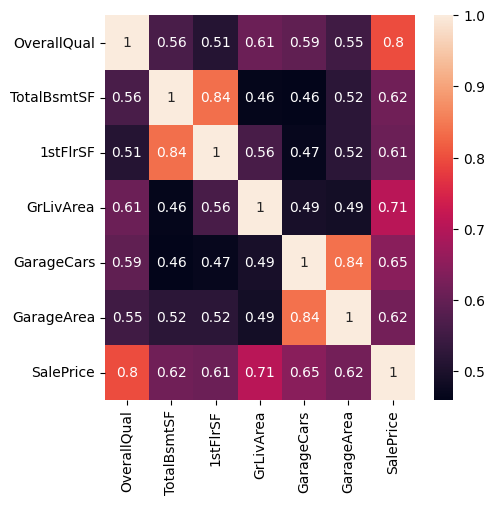

In [5]:
fig = plt.figure(figsize=(5,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

## 3. Definiendo los features y la variable a predecir

In [6]:
X = dataset.drop(['SalePrice'], axis=1)
y = dataset[['SalePrice']]

## 4. Se realiza el escalamiento de los datos

In [7]:
esc_rob = RobustScaler()
X_esc = esc_rob.fit_transform(X=X)

## 5. División de los datos en train y test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42)

## 6. Creación del modelo de regresión polinomial

In [9]:
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

#Definimos el algoritmo a utilizar
pr = LinearRegression()

#Entrenamos el modelo
pr.fit(X_train_poli, y_train)

LinearRegression()

#### 6.1. Evaluación del modelo

In [10]:
#Evaluando la predicciones
y_pred_train = pr.predict(X=X_train_poli)
y_pred_test = pr.predict(X=X_test_poli)

r2_sc_train = r2_score(y_true=y_train, y_pred=y_pred_train)
r2_sc_test = r2_score(y_true=y_test, y_pred=y_pred_test)

RMSR_train = sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train))
RMSR_test = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test))

print("R^2 train: {:.2f}".format(r2_sc_train))
print("R^2 test: {:.2f}".format(r2_sc_test))

print("\nRMSR train: {:.0f} USD".format(RMSR_train))
print("RMSR test: {:.0f} USD".format(RMSR_test))

R^2 train: 0.84
R^2 test: 0.85

RMSR train: 31584 USD
RMSR test: 34336 USD


#### 6.2. Graficación

In [11]:
df_comp = y_test.copy()
df_comp['SalePrice predict'] = np.round(y_pred_test, decimals=0)
df_comp.sort_values('SalePrice', inplace=True)
df_comp

,SalePrice,SalePrice predict
25,40000,109491.0
306,67000,129849.0
982,68400,109635.0
458,79500,108414.0
55,80000,99153.0
...,...,...
137,475000,537879.0
597,538000,385517.0
802,556581,407126.0
700,611657,404743.0


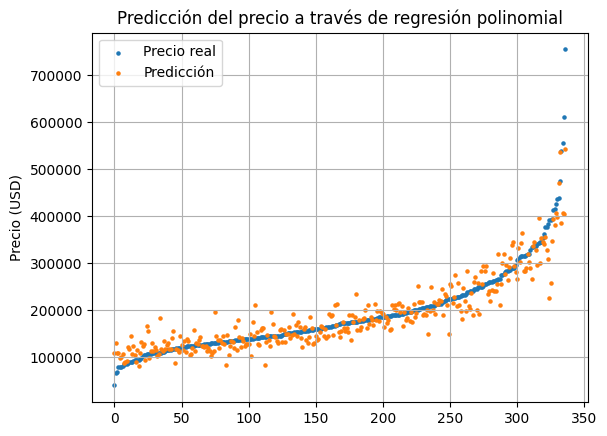

In [12]:
x = range(0,len(df_comp['SalePrice'].to_list()))
plt.scatter(x, df_comp['SalePrice'], s=5, label='Precio real')
plt.scatter(x, df_comp['SalePrice predict'], s=5, label='Predicción')
plt.legend()
plt.title('Predicción del precio a través de regresión polinomial')
plt.ylabel('Precio (USD)')
plt.grid()
plt.show()

## 7. Escogiendo diferentes niveles de correlación para observar si mejora el $R^2 score$

In [13]:
niveles_correlacion = [0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]

for i in niveles_correlacion:

    dataset = pd.read_csv('..\datos_procesados\datos_procesados.csv')
    dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
    dataset.head()

    corr_var = dataset.corr()
    corr_var_SalePrice = corr_var.loc['SalePrice',:]    

    features_sin_correlacion = corr_var_SalePrice[corr_var_SalePrice<i].index.to_list()
    dataset = dataset.drop(features_sin_correlacion, axis=1)
    
    X = dataset.drop(['SalePrice'], axis=1)
    y = dataset[['SalePrice']]

    esc_rob = RobustScaler()
    X_esc = esc_rob.fit_transform(X=X)

    X_train, X_test, y_train, y_test = train_test_split(X_esc, y, test_size=0.3, random_state=42) 

    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = 2)

    #Se transforma las características existentes en características de mayor grado
    X_train_poli = poli_reg.fit_transform(X_train)
    X_test_poli = poli_reg.fit_transform(X_test)

    #Definimos el algoritmo a utilizar
    pr = LinearRegression()

    #Entrenamos el modelo
    pr.fit(X_train_poli, y_train)

    #Evaluando la predicciones
    print('\n')
    print('='*70)
    print("Variables con una correlación mayor o igual a {}:\n".format(i))
    y_pred_train = pr.predict(X=X_train_poli)
    y_pred_test = pr.predict(X=X_test_poli)

    r2_sc_train = r2_score(y_true=y_train, y_pred=y_pred_train)
    r2_sc_test = r2_score(y_true=y_test, y_pred=y_pred_test)

    RMSR_train = sqrt(mean_squared_error(y_true=y_train, y_pred=y_pred_train))
    RMSR_test = sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test))

    print("R^2 train: {:.2f}".format(r2_sc_train))
    print("R^2 test: {:.2f}".format(r2_sc_test))

    print("\nRMSR train: {:.0f} USD".format(RMSR_train))
    print("RMSR test: {:.0f} USD".format(RMSR_test))
    

    



Variables con una correlación mayor o igual a 0.7:

R^2 train: 0.77
R^2 test: 0.79

RMSR train: 38587 USD
RMSR test: 40956 USD


Variables con una correlación mayor o igual a 0.6:

R^2 train: 0.84
R^2 test: 0.85

RMSR train: 31584 USD
RMSR test: 34336 USD


Variables con una correlación mayor o igual a 0.5:

R^2 train: 0.88
R^2 test: 0.86

RMSR train: 28092 USD
RMSR test: 33882 USD


Variables con una correlación mayor o igual a 0.4:

R^2 train: 0.90
R^2 test: 0.86

RMSR train: 25453 USD
RMSR test: 33403 USD


Variables con una correlación mayor o igual a 0.3:

R^2 train: 0.94
R^2 test: -15252470240556847104.00

RMSR train: 19715 USD
RMSR test: 349126931252289 USD


Variables con una correlación mayor o igual a 0.2:

R^2 train: 0.95
R^2 test: 0.78

RMSR train: 17179 USD
RMSR test: 42142 USD


Variables con una correlación mayor o igual a 0.1:

R^2 train: 0.98
R^2 test: 0.73

RMSR train: 12242 USD
RMSR test: 46055 USD


Variables con una correlación mayor o igual a 0.0:

R^2 train: 0.

Se puede observar que cuando se selecciona un grupo de variables descriptoras con una correlación mayor o igual a 0.4, se tiene los siguientes resultados: 

$R^2 score$ train: 0.90

$R^2 score$ test: 0.86

RMSR train: 25453 USD

RMSR test: 33403 USD